# Manipulating the Housing Dataset

#### A copied and pasted cell from the Geron text, just as a starting point to have the proper imports and data and such.

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### Get the housing dataset

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Displaying the data in different ways

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Transposing the rows and columns

In [9]:
housing.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41,21,52,52,52,52,52,52,42,52,...,11,15,15,27,28,25,18,17,18,16
total_rooms,880,7099,1467,1274,1627,919,2535,3104,2555,3549,...,2640,2655,2319,2080,2332,1665,697,2254,1860,2785
total_bedrooms,129,1106,190,235,280,213,489,687,665,707,...,505,493,416,412,395,374,150,485,409,616
population,322,2401,496,558,565,413,1094,1157,1206,1551,...,1257,1200,1047,1082,1041,845,356,1007,741,1387
households,126,1138,177,219,259,193,514,647,595,714,...,445,432,385,382,344,330,114,433,349,530
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600,358500,352100,341300,342200,269700,299200,241400,226700,261100,...,112000,107200,115600,98300,116800,78100,77100,92300,84700,89400
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


#### Sorting the data by the values in the "population" column

In [10]:
housing.sort_values(by="population")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5342,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.5360,350000.0,<1H OCEAN
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0,INLAND
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
18210,-122.06,37.39,26.0,18.0,4.0,8.0,4.0,3.7500,375000.0,NEAR BAY
3125,-117.76,35.22,4.0,18.0,3.0,8.0,6.0,1.6250,275000.0,INLAND
14822,-117.12,32.66,52.0,16.0,4.0,8.0,3.0,1.1250,60000.0,NEAR OCEAN
19389,-120.85,37.75,26.0,28.0,4.0,9.0,5.0,1.6250,85000.0,INLAND
13979,-116.76,34.14,4.0,42.0,10.0,9.0,3.0,0.5360,42500.0,INLAND
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,NEAR OCEAN


#### Selecting parts of the data

In [11]:
housing["latitude"]

0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
5        37.85
6        37.84
7        37.84
8        37.84
9        37.84
10       37.85
11       37.85
12       37.85
13       37.84
14       37.85
15       37.85
16       37.85
17       37.85
18       37.84
19       37.84
20       37.85
21       37.85
22       37.84
23       37.84
24       37.84
25       37.85
26       37.85
27       37.85
28       37.84
29       37.84
         ...  
20610    39.10
20611    39.10
20612    39.08
20613    39.09
20614    39.08
20615    39.08
20616    39.08
20617    39.06
20618    39.06
20619    39.01
20620    39.05
20621    39.01
20622    39.00
20623    39.03
20624    39.04
20625    39.12
20626    39.18
20627    39.13
20628    39.10
20629    39.12
20630    39.29
20631    39.33
20632    39.26
20633    39.19
20634    39.27
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64

In [12]:
housing[344:348]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
344,-122.18,37.75,43.0,1036.0,233.0,652.0,213.0,2.0690,84600.0,NEAR BAY
345,-122.18,37.75,36.0,1047.0,214.0,651.0,166.0,1.7120,82100.0,NEAR BAY
346,-122.17,37.76,33.0,1280.0,307.0,999.0,286.0,2.5625,89300.0,NEAR BAY
347,-122.17,37.75,43.0,1587.0,320.0,907.0,306.0,1.9821,98300.0,NEAR BAY


In [13]:
housing.loc[346]

longitude              -122.17
latitude                 37.76
housing_median_age          33
total_rooms               1280
total_bedrooms             307
population                 999
households                 286
median_income           2.5625
median_house_value       89300
ocean_proximity       NEAR BAY
Name: 346, dtype: object

In [14]:
housing.loc[500:510,["total_rooms","total_bedrooms"]]

,total_rooms,total_bedrooms
500,1974.0,426.0
501,335.0,83.0
502,1375.0,307.0
503,610.0,145.0
504,1025.0,198.0
505,2063.0,484.0
506,1872.0,419.0
507,3108.0,813.0
508,7355.0,2408.0
509,2990.0,379.0


## Plotting the data

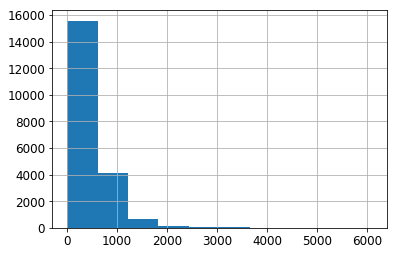

In [15]:
housing["households"].hist()

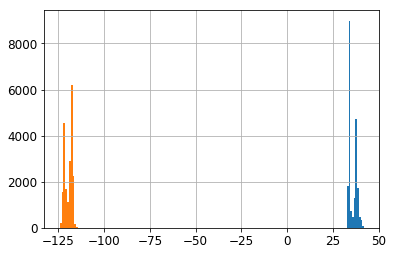

In [16]:
# Not very informative, but shows we can combine histograms
housing["latitude"].hist()
housing["longitude"].hist()

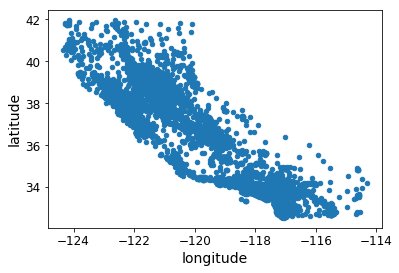

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude")

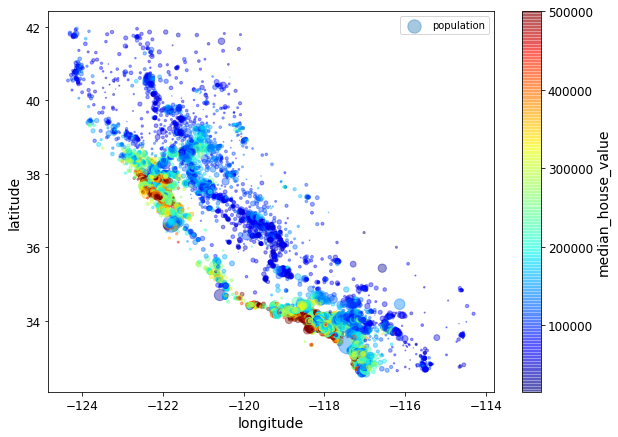

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

#### Finding out room to bedroom ratio of houses near the bay

In [19]:
# Reduce data to just houses near the bay
housing2 = housing[housing["ocean_proximity"].isin(["NEAR BAY"])].copy()
housing2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


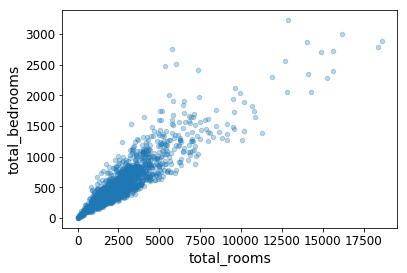

In [20]:
# plot rooms and total rooms as a scatter plot
housing2.plot(kind="scatter", x="total_rooms", y="total_bedrooms", alpha=.3)

[0, 6000, 0, 1200]

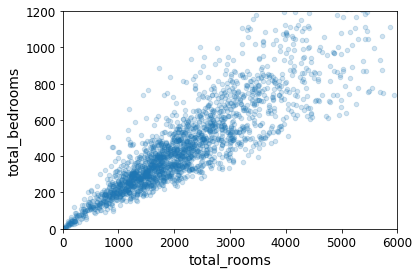

In [21]:
# zoom in to show only total room values below 6000 and total bedroom values below 1200
housing2.plot(kind="scatter", x="total_rooms", y="total_bedrooms", alpha=.2)
plt.axis([0, 6000, 0, 1200])

### Now, a brief look at a Machine Learning Model
Roughly following the steps from the Machine Learning tutorial on kaggle.com

In [22]:
# look at all columns of data to decide what our prediction target and features will be
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [26]:
# prediction target: house value
y = housing.median_house_value

# features: longitude, latitude, housing age, and total rooms
housing_features = ['longitude','latitude','housing_median_age','total_rooms']
X = housing[housing_features]

X.head()

,longitude,latitude,housing_median_age,total_rooms
0,-122.23,37.88,41.0,880.0
1,-122.22,37.86,21.0,7099.0
2,-122.24,37.85,52.0,1467.0
3,-122.25,37.85,52.0,1274.0
4,-122.25,37.85,52.0,1627.0


In [27]:
# use DecisionTreeRegressor from scikit-learn as our model
from sklearn.tree import DecisionTreeRegressor

housing_model = DecisionTreeRegressor(random_state=2)

# fit model
housing_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best')

In [31]:
# look at predictions for the following entries and compare them to our target

print("For the following locations:")
print(X.head())
print("Our predictions are:")
print(housing_model.predict(X.head()))
print("And our targets were:")
print(y.head())

For the following locations:
   longitude  latitude  housing_median_age  total_rooms
0    -122.23     37.88                41.0        880.0
1    -122.22     37.86                21.0       7099.0
2    -122.24     37.85                52.0       1467.0
3    -122.25     37.85                52.0       1274.0
4    -122.25     37.85                52.0       1627.0
Our predictions are:
[452600. 358500. 352100. 341300. 342200.]
And our targets were:
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


These predictions don't tell us much (since we fit the model to the data then got the same data out of the model), and we haven't validated our model in any way, but this demonstrates how this model works, which we can use going forward.